# Creating Product Segments

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
beer_df = pd.read_csv( "C:\Sid7\IMT Hyd\T4\MLAP\End Term\Clustering_ Segmentation - KMeans & Hierarchical\Beer.csv" )

In [3]:
beer_df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [4]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']] )


In [7]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.cluster import KMeans

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


## NO. of Clusters - Using Dendrogram

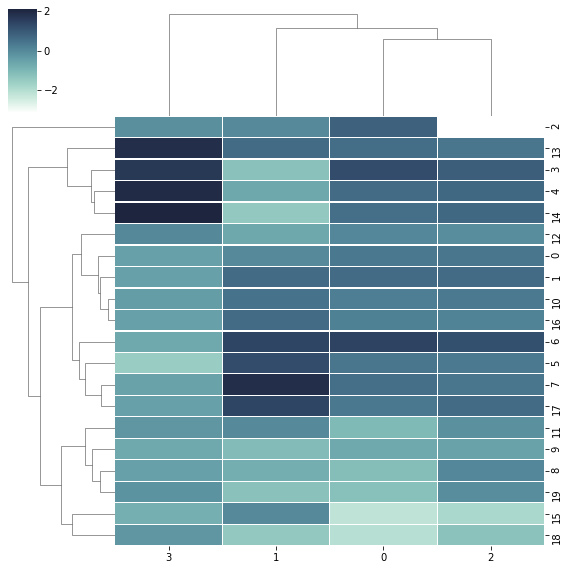

In [16]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram of Beer Dataset");

In [17]:
beer_df.iloc[[10, 16]]  # .ix is deprecated. Change ix by .loc it will work corrcetly. 
# https://stackoverflow.com/questions/59991397/attributeerror-dataframe-object-has-no-attribute-ix

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [18]:
beer_df.iloc[[2,18]]


,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


## Finding Optimal Number of Clusters using Elbow Method

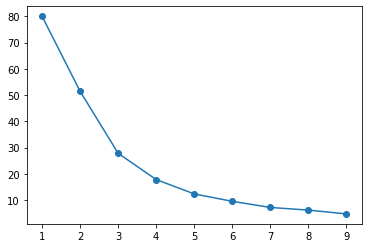

In [19]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_beer_df )
    cluster_errors.append( clusters.inertia_ )
    
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
#plt.title( "Fig 5: Elbow Diagram");

## Normalizing Features - Rescaling the dataset

In [20]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories','sodium','alcohol','cost']] )


## Creating Clusters


In [21]:
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

### Interpreting the Clusters

#### Cluster 0

In [22]:
beer_df[beer_df.clusterid == 0]


,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


#### Cluster 1

In [23]:
beer_df[beer_df.clusterid == 1]


,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


#### Cluster 2

In [24]:
beer_df[beer_df.clusterid == 2]


,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


## Hierarchical clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering


In [26]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_

In [27]:
beer_df[beer_df.h_clusterid == 0]


,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,0,0
8,Miller_Lite,99,10,4.3,0.43,0,0
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
12,Michelob_Light,135,11,4.2,0.50,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0


In [28]:
beer_df[beer_df.h_clusterid == 1]


,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,1,1
1,Schlitz,151,19,4.9,0.43,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1
6,Augsberger,175,24,5.5,0.40,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
10,Coors,140,18,4.6,0.44,1,1
16,Hamms,139,19,4.4,0.43,1,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1,1


In [29]:
beer_df[beer_df.h_clusterid == 2]


,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2
